In [ ]:
# # 한글깨짐 현상 -> 파일 열자마자 설치하고 주석처리 한 다음에 런타임 다시 돌리기 !
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/세종시/data/3.세종시_아파트(매매)_실거래가.csv', parse_dates=["계약년월"])
df.head()

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,201701,1,세종특별자치시 보람동,743,0,스타힐타워Ⅰ,16.9849,"8,600",7,2016,NaN
1,201701,1,세종특별자치시 종촌동,683,0,가재마을2단지,59.8652,"27,300",7,2014,NaN
2,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,"32,000",3,2015,NaN
3,201701,2,세종특별자치시 고운동,1706,0,가락마을8단지(고운뜰아파트),84.9800,"30,500",20,2015,NaN
4,201701,2,세종특별자치시 아름동,1284,0,범지기마을7단지 호반에코시티,84.9280,"31,300",6,2014,NaN


In [ ]:
df['시군구'].unique()

array(['세종특별자치시 보람동', '세종특별자치시 종촌동', '세종특별자치시 고운동', '세종특별자치시 아름동',
       '세종특별자치시 어진동', '세종특별자치시 연서면 봉암리', '세종특별자치시 조치원읍 신안리',
       '세종특별자치시 조치원읍 신흥리', '세종특별자치시 조치원읍 죽림리', '세종특별자치시 한솔동',
       '세종특별자치시 도담동', '세종특별자치시 연동면 명학리', '세종특별자치시 장군면 금암리', '세종특별자치시 나성동',
       '세종특별자치시 조치원읍 남리', '세종특별자치시 부강면 부강리', '세종특별자치시 조치원읍 침산리',
       '세종특별자치시 소담동', '세종특별자치시 조치원읍 번암리', '세종특별자치시 금남면 용포리',
       '세종특별자치시 전의면 동교리', '세종특별자치시 조치원읍 서창리', '세종특별자치시 전동면 노장리',
       '세종특별자치시 조치원읍 교리', '세종특별자치시 전의면 유천리', '세종특별자치시 소정면 운당리',
       '세종특별자치시 새롬동', '세종특별자치시 조치원읍 정리', '세종특별자치시 다정동', '세종특별자치시 대평동',
       '세종특별자치시 반곡동', '세종특별자치시 조치원읍 원리', '세종특별자치시 가람동', '세종특별자치시 해밀동',
       '세종특별자치시 소정면 소정리'], dtype=object)

In [ ]:
df2 = df.drop(['계약년월', '계약일','시군구','본번','부번','단지명','해제사유발생일'],axis=1)
df2

,전용면적(㎡),거래금액(만원),층,건축년도
0,16.9849,"8,600",7,2016
1,59.8652,"27,300",7,2014
2,84.9894,"32,000",3,2015
3,84.9800,"30,500",20,2015
4,84.9280,"31,300",6,2014
...,...,...,...,...
23592,126.6976,"50,000",10,2006
23593,128.9491,"44,000",2,2008
23594,84.9365,"73,500",4,2014
23595,84.6799,"60,000",6,2016


In [ ]:
df2['거래금액(만원)'] = df2['거래금액(만원)'].str.replace(',', '').astype('int64')
df2

,전용면적(㎡),거래금액(만원),층,건축년도
0,16.9849,8600,7,2016
1,59.8652,27300,7,2014
2,84.9894,32000,3,2015
3,84.9800,30500,20,2015
4,84.9280,31300,6,2014
...,...,...,...,...
23592,126.6976,50000,10,2006
23593,128.9491,44000,2,2008
23594,84.9365,73500,4,2014
23595,84.6799,60000,6,2016


In [ ]:
df['동네'] = df.시군구.str.split(' ').str[1]
df

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,동네
0,201701,1,세종특별자치시 보람동,743,0,스타힐타워Ⅰ,16.9849,"8,600",7,2016,NaN,보람동
1,201701,1,세종특별자치시 종촌동,683,0,가재마을2단지,59.8652,"27,300",7,2014,NaN,종촌동
2,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,"32,000",3,2015,NaN,고운동
3,201701,2,세종특별자치시 고운동,1706,0,가락마을8단지(고운뜰아파트),84.9800,"30,500",20,2015,NaN,고운동
4,201701,2,세종특별자치시 아름동,1284,0,범지기마을7단지 호반에코시티,84.9280,"31,300",6,2014,NaN,아름동
...,...,...,...,...,...,...,...,...,...,...,...,...
23592,202012,31,세종특별자치시 조치원읍 신흥리,398,0,신흥대우푸르지오,126.6976,"50,000",10,2006,NaN,조치원읍
23593,202012,31,세종특별자치시 조치원읍 죽림리,396,0,조치원죽림자이,128.9491,"44,000",2,2008,NaN,조치원읍
23594,202012,31,세종특별자치시 종촌동,656,0,가재마을10단지,84.9365,"73,500",4,2014,NaN,종촌동
23595,202012,31,세종특별자치시 종촌동,644,0,가재마을6단지,84.6799,"60,000",6,2016,NaN,종촌동


In [ ]:
df['동네'].unique()

array(['보람동', '종촌동', '고운동', '아름동', '어진동', '연서면', '조치원읍', '한솔동', '도담동',
       '연동면', '장군면', '나성동', '부강면', '소담동', '금남면', '전의면', '전동면', '소정면',
       '새롬동', '다정동', '대평동', '반곡동', '가람동', '해밀동'], dtype=object)

In [ ]:
df3 = df.drop(['계약년월', '시군구', '계약일','본번','부번','단지명','해제사유발생일'],axis=1)
df3

,전용면적(㎡),거래금액(만원),층,건축년도,동네
0,16.9849,"8,600",7,2016,보람동
1,59.8652,"27,300",7,2014,종촌동
2,84.9894,"32,000",3,2015,고운동
3,84.9800,"30,500",20,2015,고운동
4,84.9280,"31,300",6,2014,아름동
...,...,...,...,...,...
23592,126.6976,"50,000",10,2006,조치원읍
23593,128.9491,"44,000",2,2008,조치원읍
23594,84.9365,"73,500",4,2014,종촌동
23595,84.6799,"60,000",6,2016,종촌동


In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/세종시/data/아파트매매가_상관분석2.csv', encoding='cp949')
df4.head()

,Unnamed: 0,전용면적...,거래금액.만원.,층,건축년도,동네,동내
0,1,16.9849,"8,600",7,2016,보람동,0
1,2,59.8652,"27,300",7,2014,종촌동,1
2,3,84.9894,"32,000",3,2015,고운동,2
3,4,84.9800,"30,500",20,2015,고운동,2
4,5,84.9280,"31,300",6,2014,아름동,3


In [ ]:
df4.drop(['동네','Unnamed: 0'], axis=1, inplace=True)
df4

,전용면적...,거래금액.만원.,층,건축년도,동내
0,16.9849,"8,600",7,2016,0
1,59.8652,"27,300",7,2014,1
2,84.9894,"32,000",3,2015,2
3,84.9800,"30,500",20,2015,2
4,84.9280,"31,300",6,2014,3
...,...,...,...,...,...
23592,126.6976,"50,000",10,2006,6
23593,128.9491,"44,000",2,2008,6
23594,84.9365,"73,500",4,2014,1
23595,84.6799,"60,000",6,2016,1


In [ ]:
df_oh = pd.get_dummies(data=df4, columns=['동내'])
df_oh

,전용면적...,거래금액.만원.,층,건축년도,동내_0,동내_1,동내_2,동내_3,동내_4,동내_5,동내_6,동내_7,동내_8,동내_9,동내_10,동내_11,동내_12,동내_13,동내_14,동내_15,동내_16,동내_17,동내_18,동내_19,동내_20,동내_21,동내_22,동내_23
0,16.9849,"8,600",7,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,59.8652,"27,300",7,2014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,84.9894,"32,000",3,2015,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84.9800,"30,500",20,2015,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,84.9280,"31,300",6,2014,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23592,126.6976,"50,000",10,2006,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23593,128.9491,"44,000",2,2008,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23594,84.9365,"73,500",4,2014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23595,84.6799,"60,000",6,2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_oh['거래금액(만원)'] = df_oh['거래금액.만원.'].str.replace(',', '').astype('int64')
df_oh

,전용면적...,거래금액.만원.,층,건축년도,동내_0,동내_1,동내_2,동내_3,동내_4,동내_5,동내_6,동내_7,동내_8,동내_9,동내_10,동내_11,동내_12,동내_13,동내_14,동내_15,동내_16,동내_17,동내_18,동내_19,동내_20,동내_21,동내_22,동내_23,거래금액(만원)
0,16.9849,"8,600",7,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8600
1,59.8652,"27,300",7,2014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27300
2,84.9894,"32,000",3,2015,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32000
3,84.9800,"30,500",20,2015,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30500
4,84.9280,"31,300",6,2014,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23592,126.6976,"50,000",10,2006,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50000
23593,128.9491,"44,000",2,2008,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44000
23594,84.9365,"73,500",4,2014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73500
23595,84.6799,"60,000",6,2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60000


In [ ]:
df_oh.shape

(23597, 29)

In [ ]:
df_oh.columns = ['전용면적','거래금액(만원)','층','건축년도','보람동', '종촌동', '고운동', '아름동', '어진동', '연서면', '조치원읍', '한솔동', '도담동',
       '연동면', '장군면', '나성동', '부강면', '소담동', '금남면', '전의면', '전동면', '소정면',
       '새롬동', '다정동', '대평동', '반곡동', '가람동', '해밀동','거래금액(만원)']

In [ ]:
df_oh2 = df_oh.drop(['종촌동', '고운동', '아름동', '어진동', '연서면', '한솔동', '장군면', '전의면', '전동면', '반곡동', '가람동', '해밀동' ], axis=1)
df_oh2

,전용면적,거래금액(만원),층,건축년도,보람동,조치원읍,도담동,연동면,나성동,부강면,소담동,금남면,소정면,새롬동,다정동,대평동,거래금액(만원)
0,16.9849,"8,600",7,2016,1,0,0,0,0,0,0,0,0,0,0,0,8600
1,59.8652,"27,300",7,2014,0,0,0,0,0,0,0,0,0,0,0,0,27300
2,84.9894,"32,000",3,2015,0,0,0,0,0,0,0,0,0,0,0,0,32000
3,84.9800,"30,500",20,2015,0,0,0,0,0,0,0,0,0,0,0,0,30500
4,84.9280,"31,300",6,2014,0,0,0,0,0,0,0,0,0,0,0,0,31300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23592,126.6976,"50,000",10,2006,0,1,0,0,0,0,0,0,0,0,0,0,50000
23593,128.9491,"44,000",2,2008,0,1,0,0,0,0,0,0,0,0,0,0,44000
23594,84.9365,"73,500",4,2014,0,0,0,0,0,0,0,0,0,0,0,0,73500
23595,84.6799,"60,000",6,2016,0,0,0,0,0,0,0,0,0,0,0,0,60000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


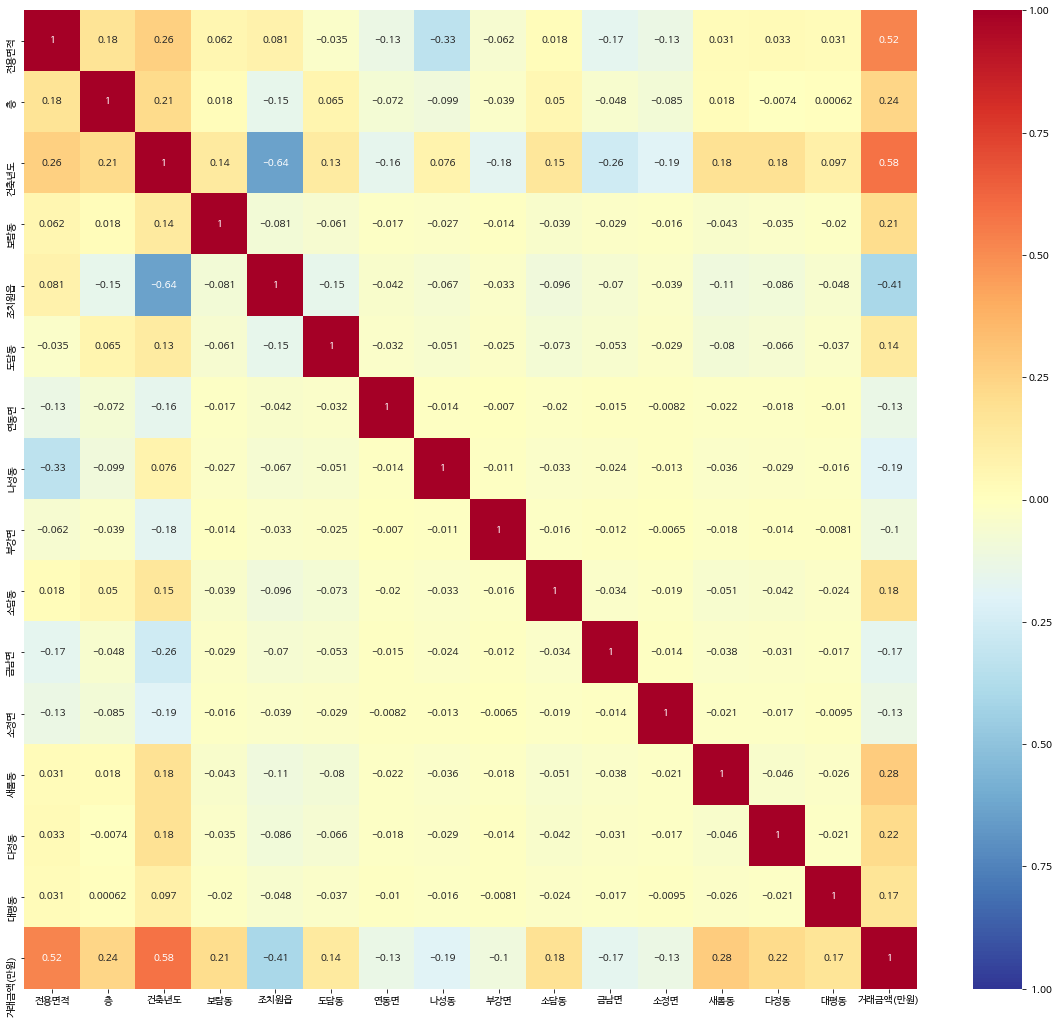

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(df_oh2.corr(), annot=True, cmap = 'RdYlBu_r',vmin = -1, vmax = 1)
plt.show()